In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [46]:
df_bank = pd.read_csv('bank.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploration and Visualization data

In [48]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
df_bank.shape

(4521, 17)

In [4]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df_bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [6]:
df_bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [7]:
df_bank.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [8]:
df_bank.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


In [9]:
df_bank.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


Text(0, 0.5, 'Frequency')

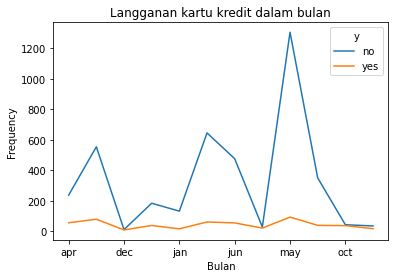

In [10]:
pd.crosstab(df_bank.month,df_bank.y).plot(kind='line')
plt.title('Langganan kartu kredit dalam bulan')
plt.xlabel('Bulan')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

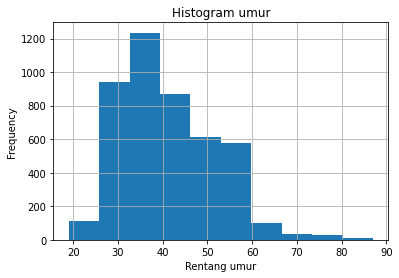

In [11]:
df_bank.age.hist()
plt.title('Histogram umur')
plt.xlabel('Rentang umur')
plt.ylabel('Frequency')

In [12]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Preprocessing data

In [13]:
df_bank['y'].replace(['no', 'yes'], [0,1], inplace=True)

In [14]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(df_bank[var], prefix=var)
    data = df_bank.join(cat_list)
    df_bank = data

    
    
cat_vars = ['job','marital','education','default','housing','loan','contact','month', 'poutcome']
data_vars = df_bank.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

print(to_keep)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [15]:
data_final = df_bank[to_keep]
data_final

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [16]:
X = data_final.loc[:, data_final.columns != 'y']
print(X)
y = data_final.loc[:, data_final.columns == 'y']
print(y)

      age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0      30     1787   19        79         1     -1         0           0   
1      33     4789   11       220         1    339         4           0   
2      35     1350   16       185         1    330         1           0   
3      30     1476    3       199         4     -1         0           0   
4      59        0    5       226         1     -1         0           0   
...   ...      ...  ...       ...       ...    ...       ...         ...   
4516   33     -333   30       329         5     -1         0           0   
4517   57    -3313    9       153         1     -1         0           0   
4518   57      295   19       151        11     -1         0           0   
4519   28     1137    6       129         4    211         3           0   
4520   44     1136    3       345         2    249         7           0   

      job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0     

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression 

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

C:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
log_reg.score(X_test, y_test)

0.8769344141488578

In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [21]:
matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(matrix_log_reg)

[[1154   36]
 [ 131   36]]


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
knn.score(X_test, y_test)

0.871039056742815

In [24]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of naive bayes classifier on test set: 0.87


In [25]:
matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(matrix_knn)

[[1149   41]
 [ 134   33]]


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

rclf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

rclf.fit(X_train, y_train)

y_pred_rclf = rclf.predict(X_test)

In [27]:
rclf.score(X_test, y_test)

0.8894620486366986

In [28]:
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(rclf.score(X_test, y_test)))

Accuracy of naive bayes classifier on test set: 0.89


In [29]:
matrix_rclf = confusion_matrix(y_test, y_pred_rclf)
print(matrix_rclf)

[[1142   48]
 [ 102   65]]


# Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_16084/2486359600.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [31]:
clf.score(X_test, y_test)

0.8887251289609432

In [32]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of naive bayes classifier on test set: 0.89


In [33]:
matrix_clf = confusion_matrix(y_test, y_pred_clf)
print(matrix_clf)

[[1169   21]
 [ 130   37]]


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

C:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
gnb.score(X_test, y_test)

0.8282977155490051

In [36]:
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of naive bayes classifier on test set: 0.83


In [37]:
matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(matrix_gnb)

[[1040  150]
 [  83   84]]


# SVM 

In [38]:
from sklearn import svm

sclf = svm.SVC()

sclf.fit(X_train, y_train)

y_pred_svm = sclf.predict(X_test)

C:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
sclf.score(X_test, y_test)

0.8769344141488578

In [40]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(sclf.score(X_test, y_test)))

Accuracy of naive bayes classifier on test set: 0.88


In [41]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(matrix_svm)

[[1190    0]
 [ 167    0]]


# Conclusion 
Untuk pemilihan model saya mencoba menjabarkan menggunakan semua model yang ada dan saya memilih untuk menggunakan Model Decision Tree dari seluruh model yang sudah dibuat. walaupun berbeda hanya 1 angka dari Random Forest namun Decision Tree tetap unggul dalam tingkat Accuracy dari dataset diatas.

In [44]:
print('Accuracy of logistic regression : {:.2f}'.format(log_reg.score(X_test, y_test)))
print('Accuracy of KNN : {:.2f}'.format(knn.score(X_test, y_test)))
print('Accuracy of decision tree : {:.2f}'.format(rclf.score(X_test, y_test)))
print('Accuracy of random forest : {:.2f}'.format(clf.score(X_test, y_test)))
print('Accuracy of naive bayes : {:.2f}'.format(gnb.score(X_test, y_test)))
print('Accuracy of SVM : {:.2f}'.format(sclf.score(X_test, y_test)))

Accuracy of logistic regression : 0.88
Accuracy of KNN : 0.87
Accuracy of decision tree : 0.89
Accuracy of random forest : 0.89
Accuracy of naive bayes : 0.83
Accuracy of SVM : 0.88


In [42]:
# from pycaret.classification import *
# s = setup(df_bank, target = 'y') 

In [43]:
# best = compare_models()